# Count


In [1]:
FILE_NAME = "word2vec"
GRAPH_TITLE = "Word2Vec"


In [2]:
from utils.load_data import get_data

In [3]:
X_train, X_test, y_train, y_test = get_data("2xs")
print([X_train.shape, X_test.shape, y_train.shape, y_test.shape])


[(16000,), (4000,), (16000,), (4000,)]


## Fit Model


In [4]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from gensim.models import Word2Vec
from utils.word2vec import GensimVectorizer

model_word2vec = Word2Vec.load("./output/word2vec.model")


In [5]:
def make_pipeline(classifier):
    return Pipeline(
        [
            ("vect", GensimVectorizer(model=model_word2vec)),
            ("clf", classifier),
        ]
    )


pipelines = {
    'nb_pipeline': make_pipeline(BernoulliNB()),
    'lr_pipeline': make_pipeline(LogisticRegression(max_iter=1000, C=10, n_jobs=-2)),
    'dt_pipeline': make_pipeline(DecisionTreeClassifier()),
    'rf_pipeline': make_pipeline(RandomForestClassifier(n_jobs=-2, n_estimators=100)),
    'svm_pipeline': make_pipeline(svm.SVC(C=10, probability=True)),
}


In [6]:
def fit(key, pipeline):
    print(key)
    pipeline.fit(X_train, y_train)
    return pipeline

pipelines_fit = {k: fit(k, v) for k, v in pipelines.items()}

nb_pipeline
lr_pipeline
dt_pipeline
rf_pipeline
svm_pipeline


In [7]:
{k: v.classes_ for k, v in pipelines_fit.items()}

{'nb_pipeline': array(['false', 'true'], dtype='<U5'),
 'lr_pipeline': array(['false', 'true'], dtype=object),
 'dt_pipeline': array(['false', 'true'], dtype=object),
 'rf_pipeline': array(['false', 'true'], dtype=object),
 'svm_pipeline': array(['false', 'true'], dtype=object)}

## Evaluation


In [8]:
from utils.plot import plot_eval
import sklearn.metrics as metrics


In [9]:
def calc_eval(classifier, X, y):
    print(classifier)
    pred = classifier.predict(X)
    return {
        "auc": metrics.roc_auc_score(y, classifier.predict_proba(X)[:, 1]),
        "accuracy": metrics.accuracy_score(y, pred),
        "precision": metrics.precision_score(y, pred, pos_label="true"),  # type: ignore
        "recall": metrics.recall_score(y, pred, pos_label="true"),  # type: ignore
        "f1": metrics.f1_score(y, pred, pos_label="true"),  # type: ignore
    }


In [10]:
import json

result = {k: calc_eval(v, X_test, y_test) for k, v in pipelines_fit.items()}
print(json.dumps(result, indent=4))

Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', BernoulliNB())])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-2))])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', RandomForestClassifier(n_jobs=-2))])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', SVC(C=10, probability=True))])
{
    "nb_pipeline": {
        "auc": 0.5873131673844134,
        "accuracy": 

nb_pipeline
              precision    recall  f1-score   support

       false       0.56      0.41      0.48      1952
        true       0.55      0.69      0.61      2048

    accuracy                           0.56      4000
   macro avg       0.56      0.55      0.54      4000
weighted avg       0.56      0.56      0.55      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


lr_pipeline
              precision    recall  f1-score   support

       false       0.57      0.56      0.56      1952
        true       0.58      0.59      0.59      2048

    accuracy                           0.57      4000
   macro avg       0.57      0.57      0.57      4000
weighted avg       0.57      0.57      0.57      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


dt_pipeline
              precision    recall  f1-score   support

       false       0.60      0.62      0.61      1952
        true       0.62      0.60      0.61      2048

    accuracy                           0.61      4000
   macro avg       0.61      0.61      0.61      4000
weighted avg       0.61      0.61      0.61      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


rf_pipeline
              precision    recall  f1-score   support

       false       0.67      0.68      0.68      1952
        true       0.69      0.69      0.69      2048

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


svm_pipeline
              precision    recall  f1-score   support

       false       0.61      0.45      0.51      1952
        true       0.58      0.73      0.64      2048

    accuracy                           0.59      4000
   macro avg       0.59      0.59      0.58      4000
weighted avg       0.59      0.59      0.58      4000



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


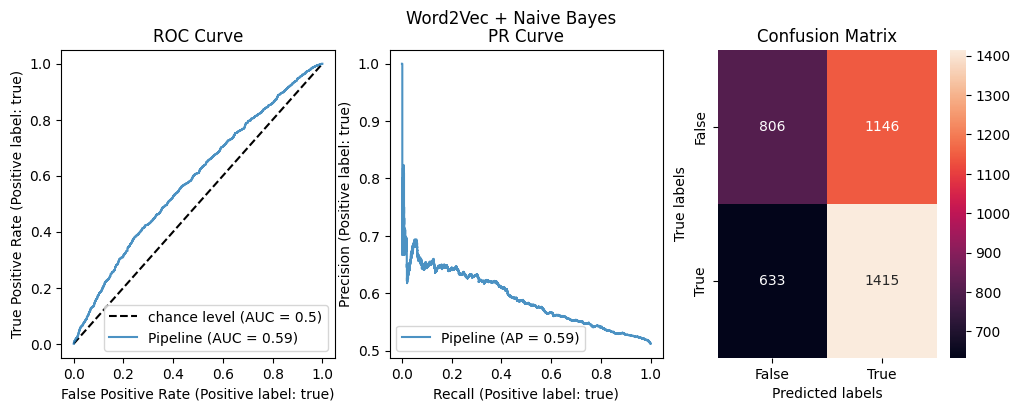

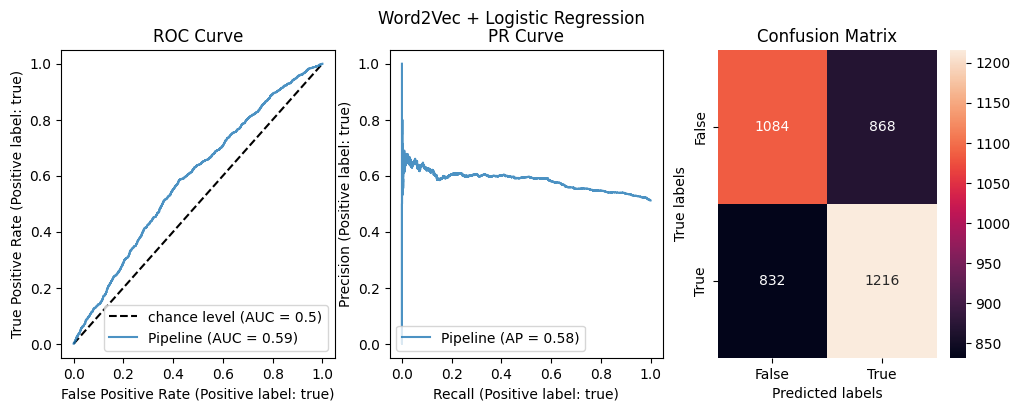

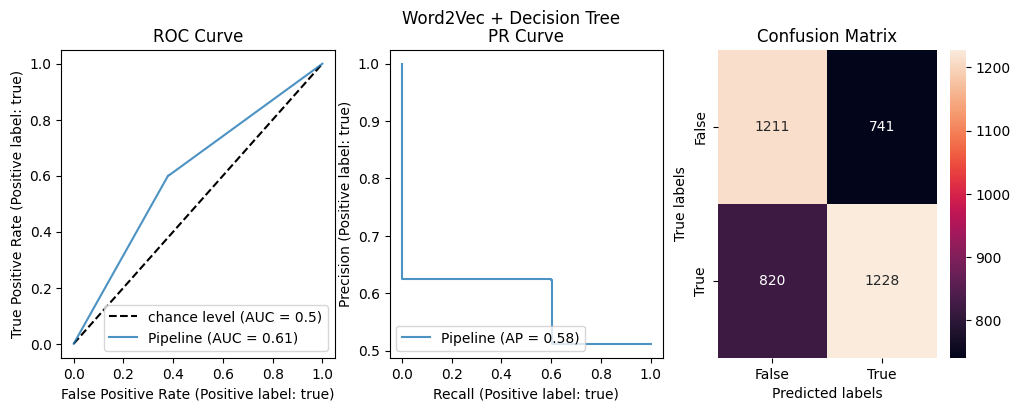

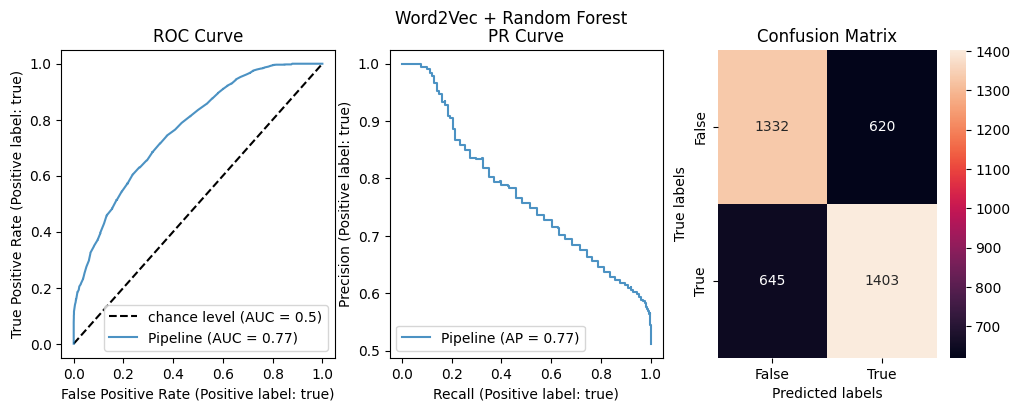

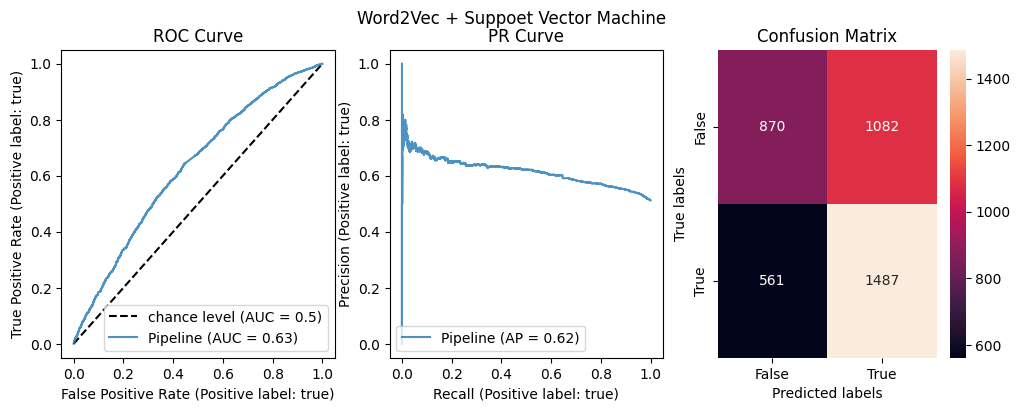

In [11]:
names = {
    'nb_pipeline': "Naive Bayes",
    'lr_pipeline': "Logistic Regression",
    'dt_pipeline': "Decision Tree",
    'rf_pipeline': "Random Forest",
    'svm_pipeline': "Suppoet Vector Machine",
}

for k, classifier in pipelines_fit.items():
    y_pred = classifier.predict(X_test)
    clf_report = metrics.classification_report(y_test, y_pred)
    print(k)
    print(clf_report)
    
    plt = plot_eval(X_test, y_test, y_pred, classifier, f'{GRAPH_TITLE} + {names[k]}')
    plt.savefig(f"output/{FILE_NAME}_{names[k]}.png")



## LIAR Test


In [12]:
from utils.load_data import load_liar

X_liar, y_liar = load_liar()


In [13]:
import json

result = {k: calc_eval(v, X_liar, y_liar) for k, v in pipelines_fit.items()}
print(json.dumps(result, indent=4))

Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', BernoulliNB())])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-2))])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', RandomForestClassifier(n_jobs=-2))])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', SVC(C=10, probability=True))])
{
    "nb_pipeline": {
        "auc": 0.491478329165951,
        "accuracy": 0

nb_pipeline
              precision    recall  f1-score   support

       false       0.64      0.29      0.40      8284
        true       0.35      0.70      0.46      4507

    accuracy                           0.43     12791
   macro avg       0.49      0.49      0.43     12791
weighted avg       0.54      0.43      0.42     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


lr_pipeline
              precision    recall  f1-score   support

       false       0.65      0.30      0.41      8284
        true       0.35      0.70      0.47      4507

    accuracy                           0.44     12791
   macro avg       0.50      0.50      0.44     12791
weighted avg       0.54      0.44      0.43     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


dt_pipeline
              precision    recall  f1-score   support

       false       0.64      0.46      0.54      8284
        true       0.35      0.53      0.42      4507

    accuracy                           0.48     12791
   macro avg       0.49      0.49      0.48     12791
weighted avg       0.54      0.48      0.49     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


rf_pipeline
              precision    recall  f1-score   support

       false       0.63      0.37      0.47      8284
        true       0.34      0.61      0.44      4507

    accuracy                           0.45     12791
   macro avg       0.49      0.49      0.45     12791
weighted avg       0.53      0.45      0.46     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


svm_pipeline
              precision    recall  f1-score   support

       false       0.65      0.23      0.34      8284
        true       0.35      0.78      0.49      4507

    accuracy                           0.42     12791
   macro avg       0.50      0.50      0.41     12791
weighted avg       0.55      0.42      0.39     12791



/home/kooler/dev/sw/sns-fake-content/model/utils/plot.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


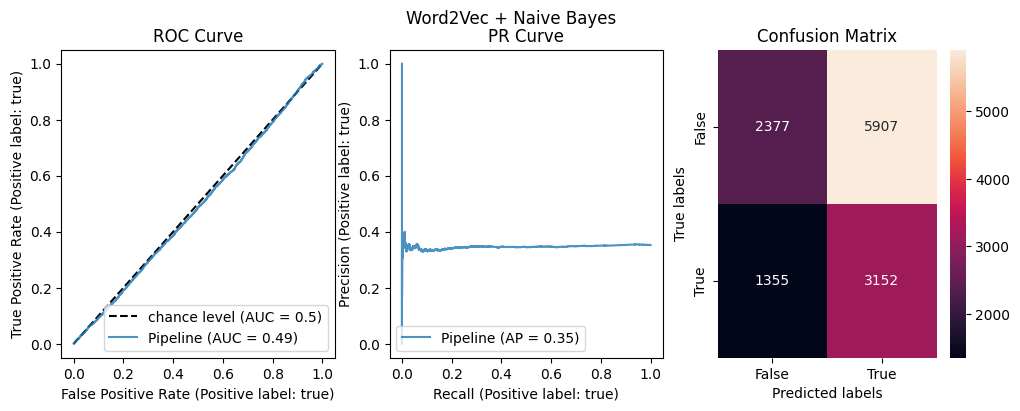

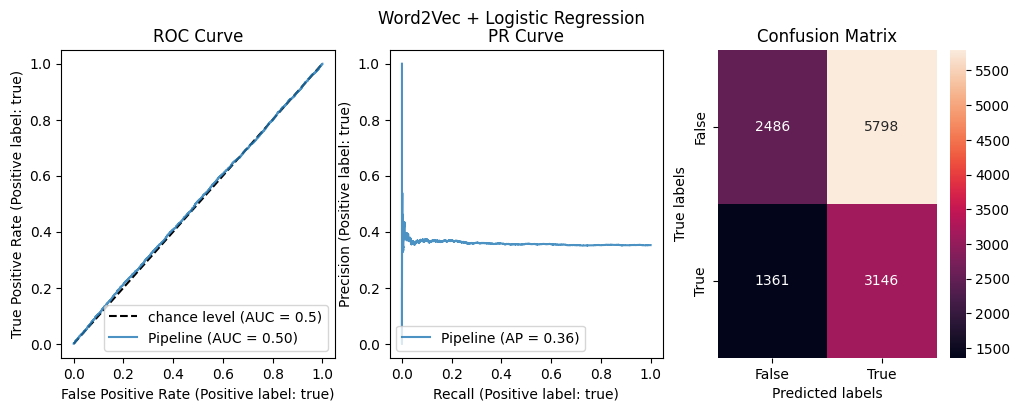

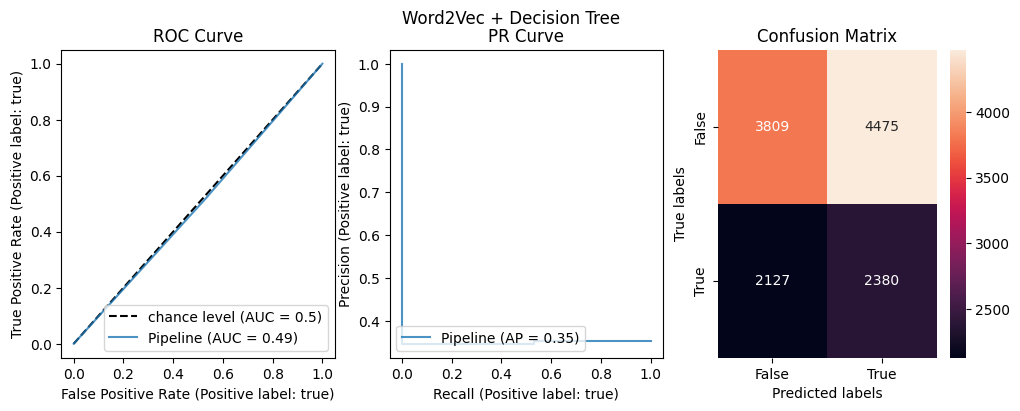

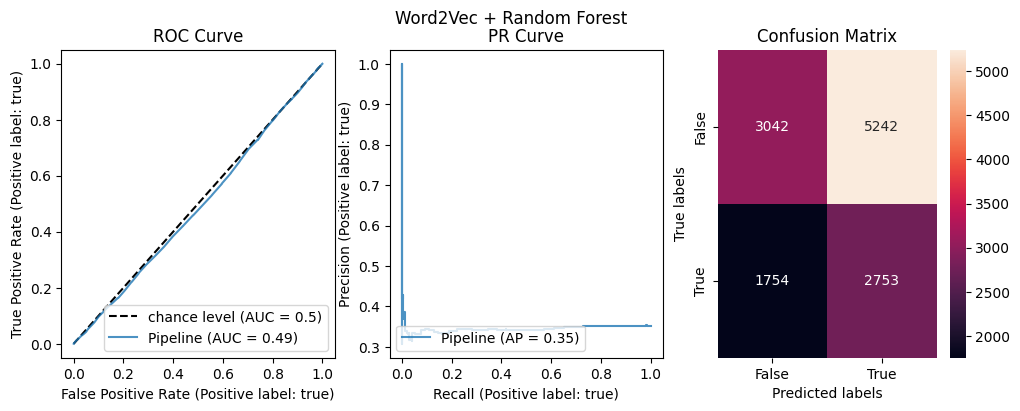

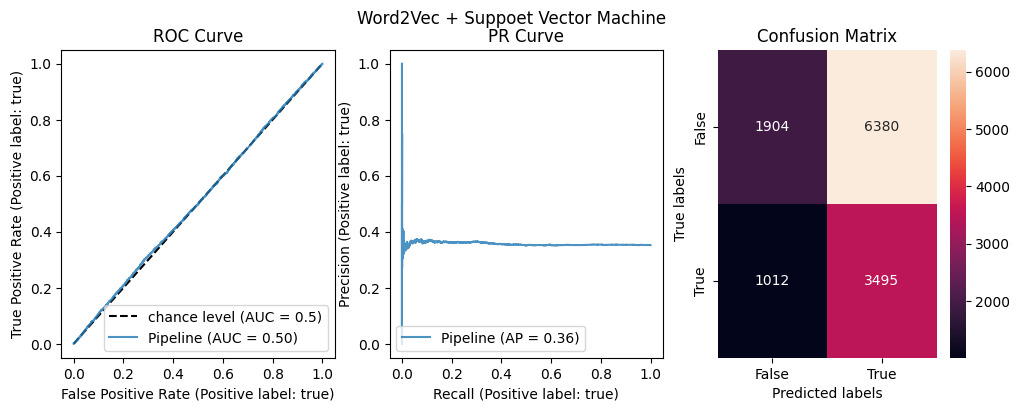

In [14]:
for k, classifier in pipelines_fit.items():
    y_pred = classifier.predict(X_liar)
    clf_report = metrics.classification_report(y_liar, y_pred)
    print(k)
    print(clf_report)

    plt = plot_eval(X_liar, y_liar, y_pred, classifier, f"{GRAPH_TITLE} + {names[k]}")
    plt.savefig(f"output/{FILE_NAME}_liar_{names[k]}.png")


In [15]:
import json

with open(f"./output/{FILE_NAME}_result_eval.txt", "w") as writer:
    writer.write("Result\n")
    result = {k: calc_eval(v, X_test, y_test) for k, v in pipelines_fit.items()}
    writer.write(
        json.dumps(
            result,
            indent=4,
        )
    )
    writer.write("LIAR Result\n")
    result = {k: calc_eval(v, X_liar, y_liar) for k, v in pipelines_fit.items()}
    writer.write(
        json.dumps(
            result,
            indent=4,
        )
    )


Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', BernoulliNB())])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', LogisticRegression(C=10, max_iter=1000, n_jobs=-2))])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', DecisionTreeClassifier())])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', RandomForestClassifier(n_jobs=-2))])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.models.word2vec.Word2Vec object at 0x7f385bb1aaf0>)),
                ('clf', SVC(C=10, probability=True))])
Pipeline(steps=[('vect',
                 GensimVectorizer(model=<gensim.model

## Export model


In [16]:
from joblib import dump, load

for k, v in pipelines_fit.items():
    dump(classifier, f"output/{FILE_NAME}_{k}.joblib")


In [17]:
# # Convert into ONNX format
# from skl2onnx import convert_sklearn
# from skl2onnx.common.data_types import StringTensorType

# initial_type = [
#     (
#         "text",
#         StringTensorType(
#             [
#                 None,
#             ]
#         ),
#     )
# ]

In [18]:
# for k, v in pipelines_fit.items():
#     onx = convert_sklearn(classifier, initial_types=initial_type)
#     with open(f"output/{FILE_NAME}_{k}.onnx", "wb") as f:
#         f.write(onx.SerializeToString())

In [19]:
# # Compute the prediction with ONNX Runtime
# import onnxruntime as rt
# import numpy

# sess = rt.InferenceSession(
#     f"output/{FILE_NAME}.onnx", providers=["CPUExecutionProvider"]
# )
# input_name = sess.get_inputs()[0].name
# label_name = sess.get_outputs()[0].name


In [20]:
# pred_onx = sess.run(None, {input_name: X_test})
# pred_onx
